In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
import tensorflow
from tensorflow.keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
gas=pd.read_csv("gas_turbines.csv")
gas.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [ ]:
gas.shape

(15039, 11)

In [ ]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [ ]:
gas[gas.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


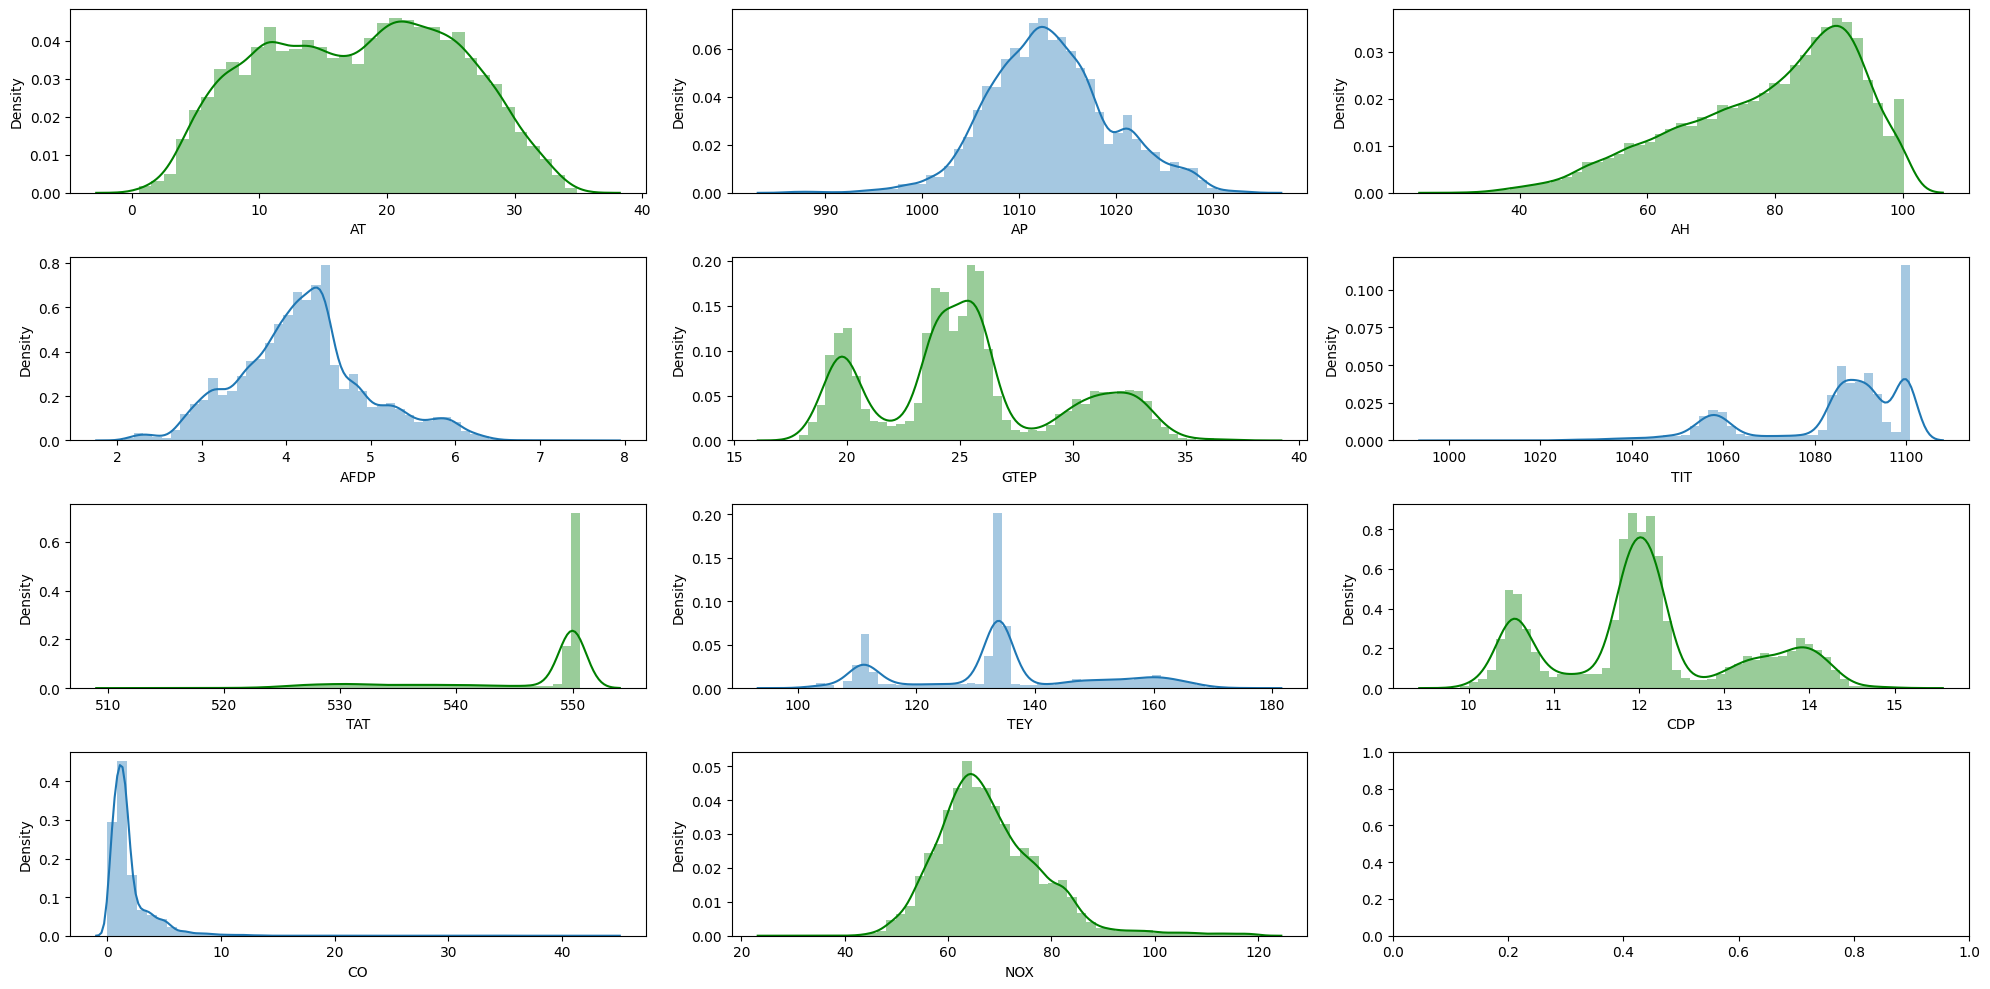

In [ ]:
fig,ax=plt.subplots(4, 3, figsize=(20,10))

sns.distplot(gas.AT,ax=ax[0,0],color='g')
sns.distplot(gas.AP,ax=ax[0,1])
sns.distplot(gas.AH,ax=ax[0,2],color='g')
sns.distplot(gas.AFDP,ax=ax[1,0])
sns.distplot(gas.GTEP,ax=ax[1,1],color='g')
sns.distplot(gas.TIT,ax=ax[1,2])
sns.distplot(gas.TAT,ax=ax[2,0],color='g')
sns.distplot(gas.TEY,ax=ax[2,1])
sns.distplot(gas.CDP,ax=ax[2,2],color='g')
sns.distplot(gas.CO,ax=ax[3,0])
sns.distplot(gas.NOX,ax=ax[3,1],color='g')

plt.tight_layout()

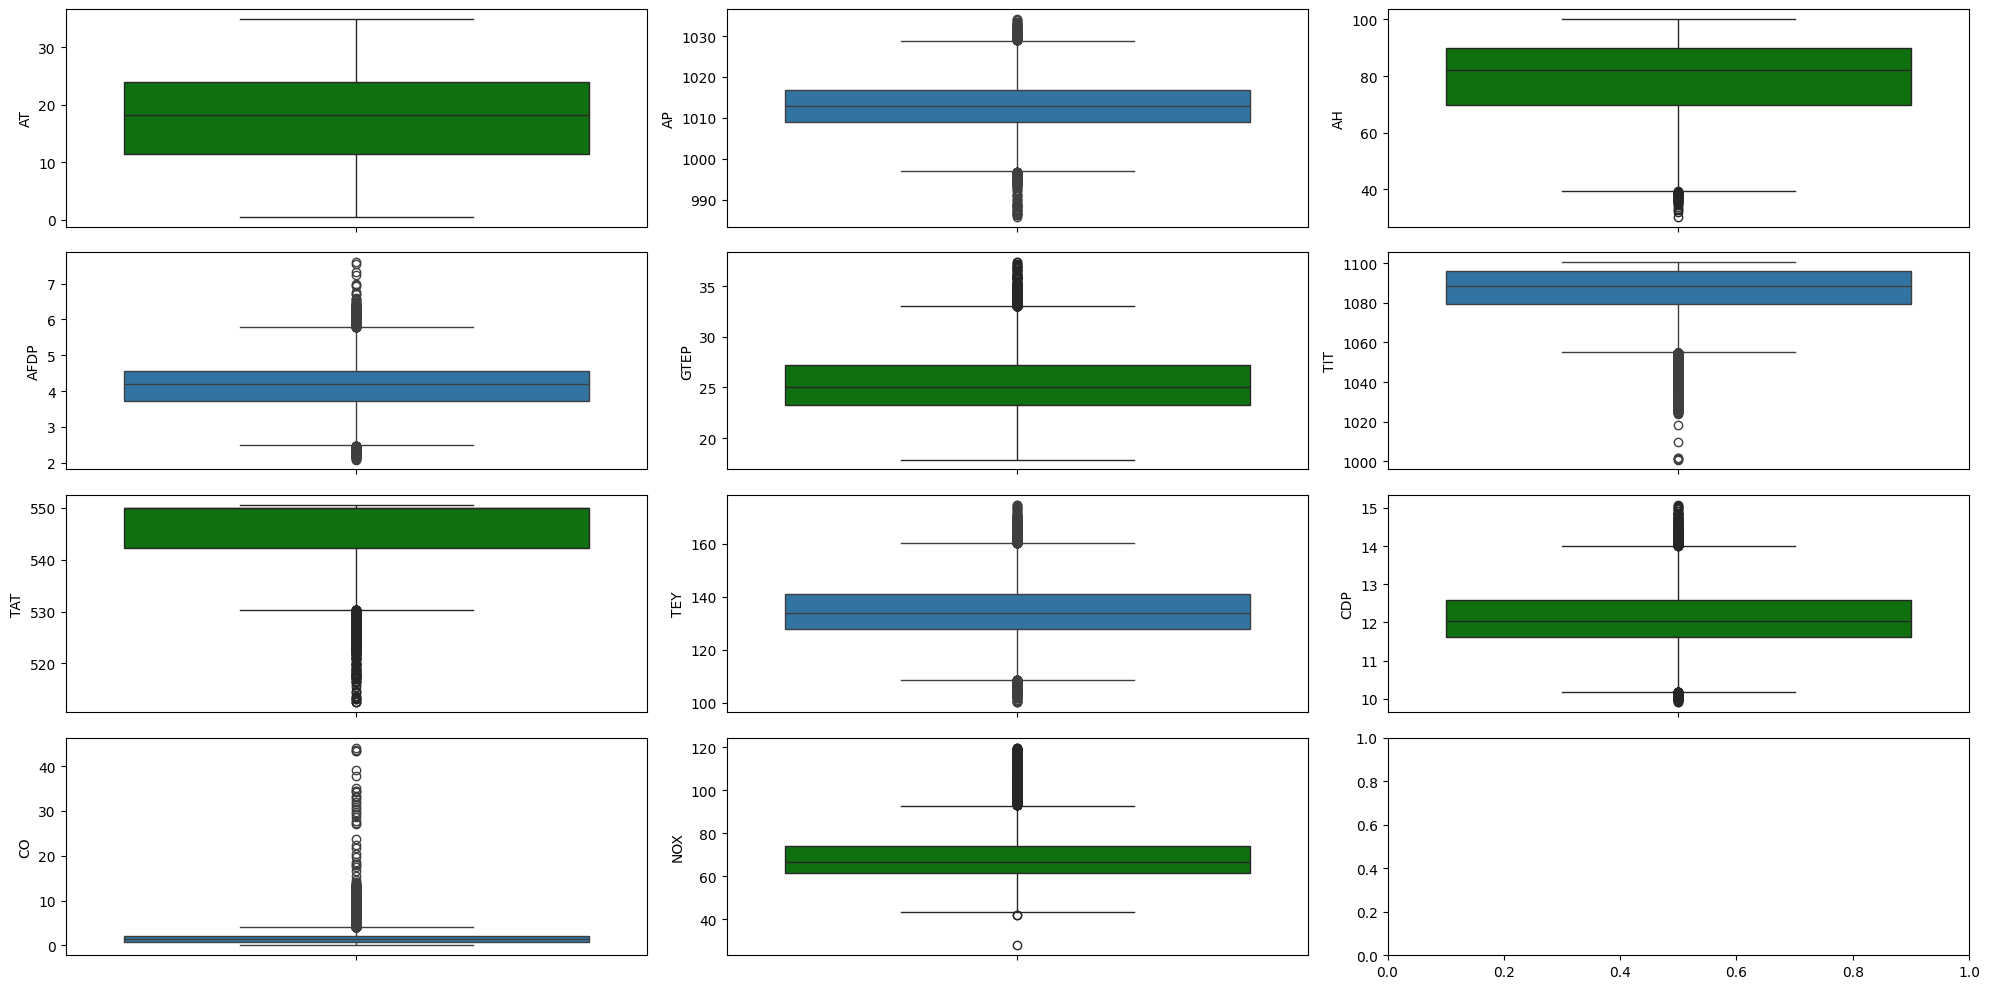

In [ ]:
fig,ax=plt.subplots(4, 3, figsize=(20,10))

sns.boxplot(gas.AT,ax=ax[0,0],color='g')
sns.boxplot(gas.AP,ax=ax[0,1])
sns.boxplot(gas.AH,ax=ax[0,2],color='g')
sns.boxplot(gas.AFDP,ax=ax[1,0])
sns.boxplot(gas.GTEP,ax=ax[1,1],color='g')
sns.boxplot(gas.TIT,ax=ax[1,2])
sns.boxplot(gas.TAT,ax=ax[2,0],color='g')
sns.boxplot(gas.TEY,ax=ax[2,1])
sns.boxplot(gas.CDP,ax=ax[2,2],color='g')
sns.boxplot(gas.CO,ax=ax[3,0])
sns.boxplot(gas.NOX,ax=ax[3,1],color='g')

plt.tight_layout()

In [ ]:
x= gas.iloc[:,[0,1,2,3,4,5,6,8,9,10]]
y= gas.iloc[:,7]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
# Building the Neural Network
model = Sequential()

In [ ]:
# Adding the input layer and the first hidden layer
model.add(Dense(units=64, activation='relu', input_dim=x_train.shape[1]))

In [ ]:
# Adding the second hidden layer
model.add(Dense(units=32, activation='relu'))

In [ ]:
# Adding the output layer
model.add(Dense(units=1, activation='linear'))  # Linear activation for regression

In [ ]:
# Compiling the Neural Network
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Training the Neural Network
model.fit(x_train, y_train, batch_size=32, epochs=100, validation_split=0.2)

Epoch 1/100
301/301 [==============================] - 2s 5ms/step - loss: 8092.9502 - val_loss: 693.4498
Epoch 2/100
301/301 [==============================] - 1s 4ms/step - loss: 374.9117 - val_loss: 243.6378
Epoch 3/100
301/301 [==============================] - 1s 5ms/step - loss: 172.2517 - val_loss: 145.9055
Epoch 4/100
301/301 [==============================] - 1s 3ms/step - loss: 110.1377 - val_loss: 103.6899
Epoch 5/100
301/301 [==============================] - 1s 3ms/step - loss: 79.9070 - val_loss: 75.8610
Epoch 6/100
301/301 [==============================] - 1s 3ms/step - loss: 59.5322 - val_loss: 57.1036
Epoch 7/100
301/301 [==============================] - 1s 3ms/step - loss: 44.1796 - val_loss: 42.4104
Epoch 8/100
301/301 [==============================] - 1s 3ms/step - loss: 32.5078 - val_loss: 30.8127
Epoch 9/100
301/301 [==============================] - 1s 3ms/step - loss: 23.8336 - val_loss: 22.5411
Epoch 10/100
301/301 [==============================] - 1s 3ms/s

In [ ]:
# Predicting the Test set results
y_pred = model.predict(x_test)

94/94 [==============================] - 0s 1ms/step


In [ ]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.38554703845758825


#The neural network helps predicting turbine energy yield with a highest evaluation accuracy of 99.62% and with a minimal loss of 0.38%